## We Will Learn 
- Logistic Regression
- Hyperparameter
- Implementations

http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

### Logistic Regression

- https://www.simplilearn.com/tutorials/machine-learning-tutorial/logistic-regression-in-python
- https://machinelearningmastery.com/logistic-regression-for-machine-learning/
- https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
- https://medium.com/@jumbongjunior1999/ordinal-logistic-regression-in-python-and-r-f6ee05d48d16


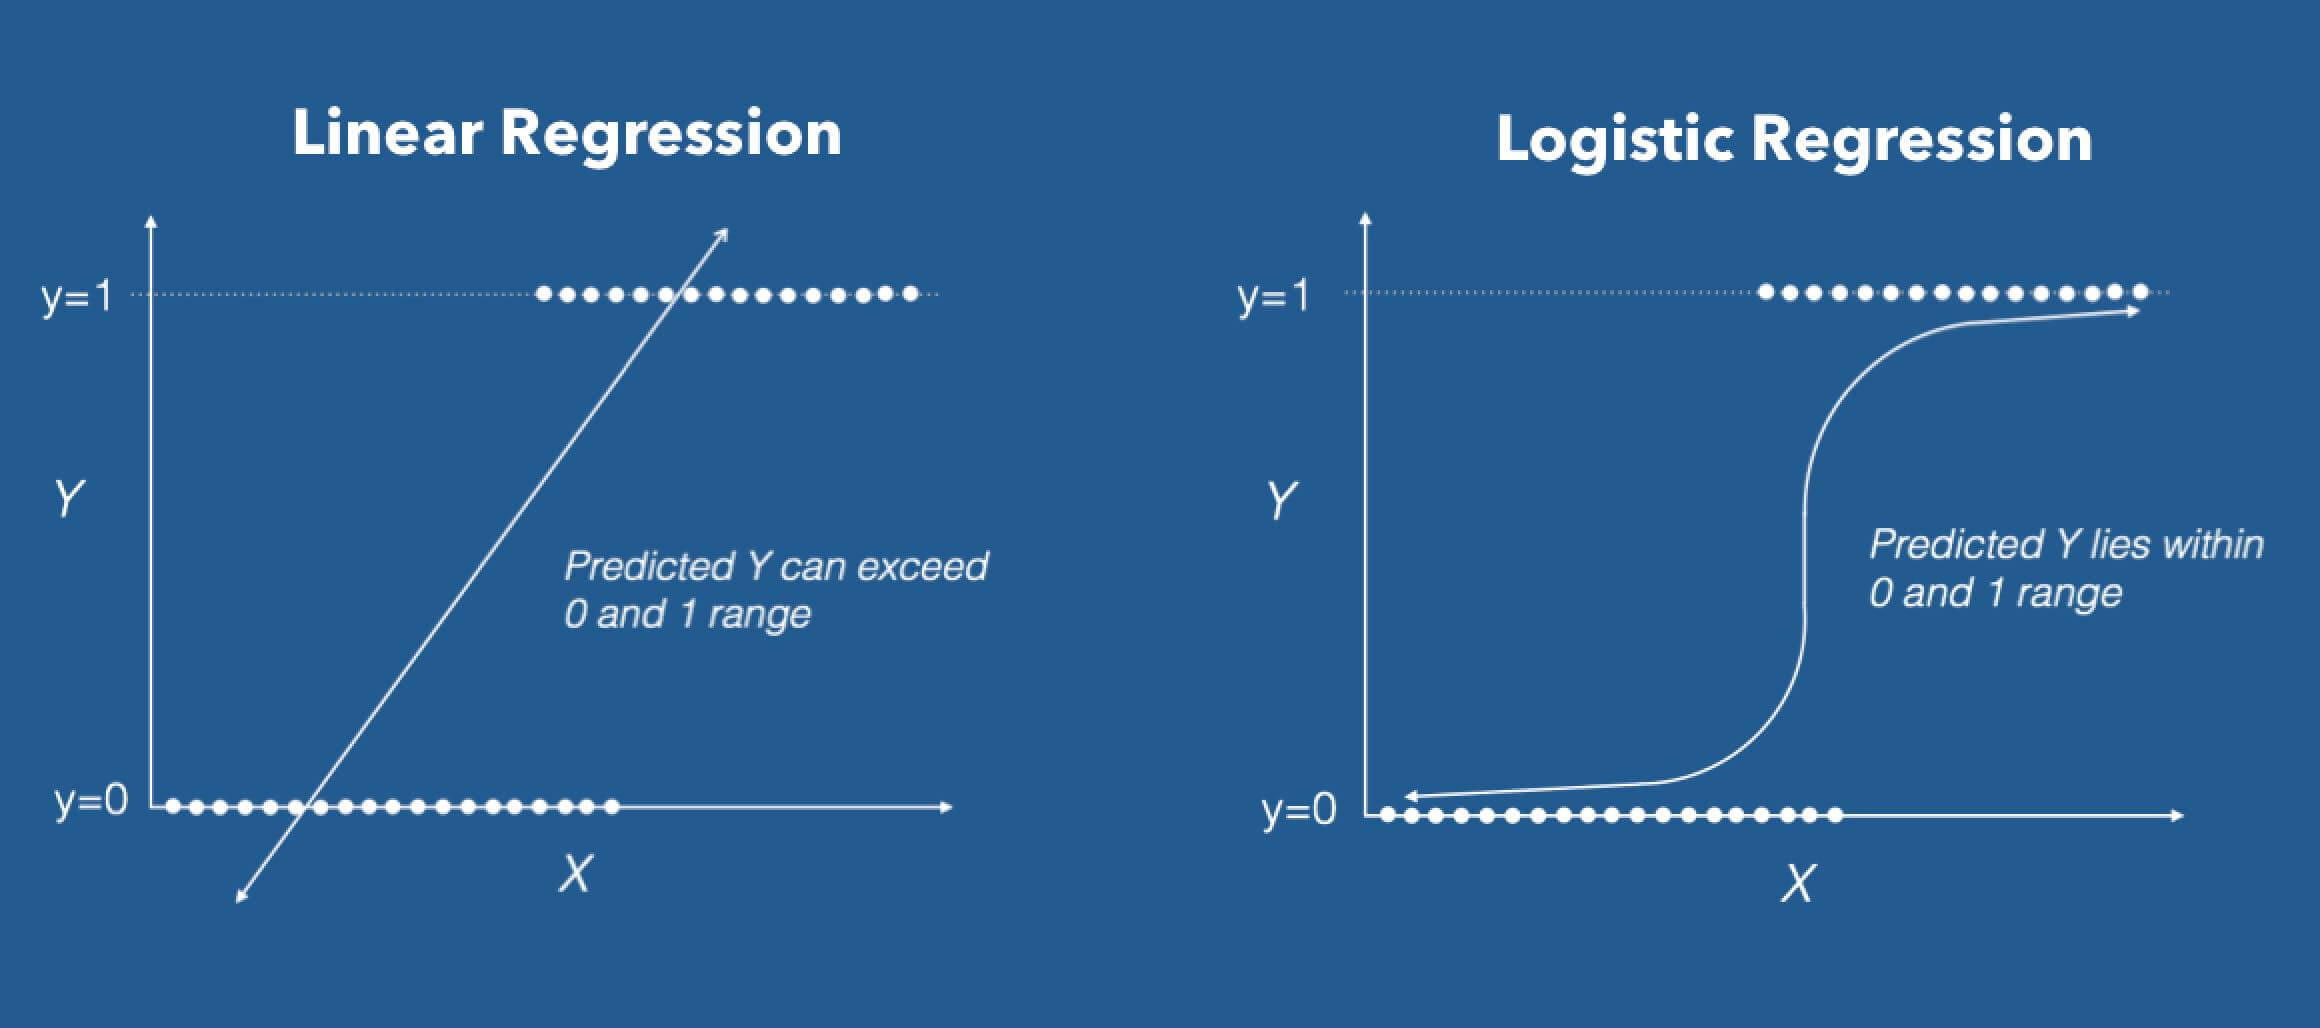

In [8]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(data.DESCR)

In [ ]:
# data in array format
data.data

In [11]:
# show the label/ y /Target
data.target  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
#  name of columns or features
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df["target"].unique()

array([0, 1, 2])

### Binomial Classifinations in Logistic Regression
- tagrget variable is binary (0/1, yes/no, etc.)

In [16]:
df.target.unique()

array([0, 1, 2])

In [17]:
df.target != 2

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: target, Length: 150, dtype: bool

In [18]:
# df.sample(2)
#for implementing binomial logistic regression for two class
df = df[df.target != 2] 

In [19]:
df.target.unique()

array([0, 1])

In [20]:
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
X = df.drop('target', axis=1)
y = df['target']

In [21]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [22]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train.shape, y_train.shape


((80, 4), (80,))

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [25]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [26]:
classifier.coef_

array([[ 0.46100411, -0.78836575,  2.18624929,  0.92865666]])

In [27]:
classifier.intercept_

array([-6.80586873])

In [28]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [29]:

classifier.predict_proba(X_test)

array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

## Evaluations matrix in classifications

A confusion matrix is a table that helps evaluate the performance of a classification model by comparing predicted values to actual values.

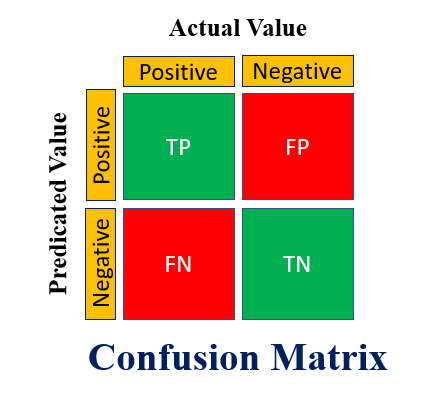

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred))

[[ 8  0]
 [ 0 12]]


- A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.
- An accuracy score is a metric that measures how well a model can correctly classify data points. It's calculated by dividing the number of correct predictions by the total number of predictions.
- The classification report is a tool used in machine learning to evaluate the performance of a classification model. It displays various metrics such as precision, recall, and F1 score for each class in the classification problem.

=============

- Recall is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. You can calculate recall by dividing the number of true positives by the number of positive instances.
- https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall

- Precision is a metric that measures how often a machine learning model correctly predicts the positive class. You can calculate precision by dividing the number of correct positive predictions (true positives) by the total number of instances the model predicted as positive (both true and false positives).

In [31]:

accuracy_score(y_test, y_pred)


1.0

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



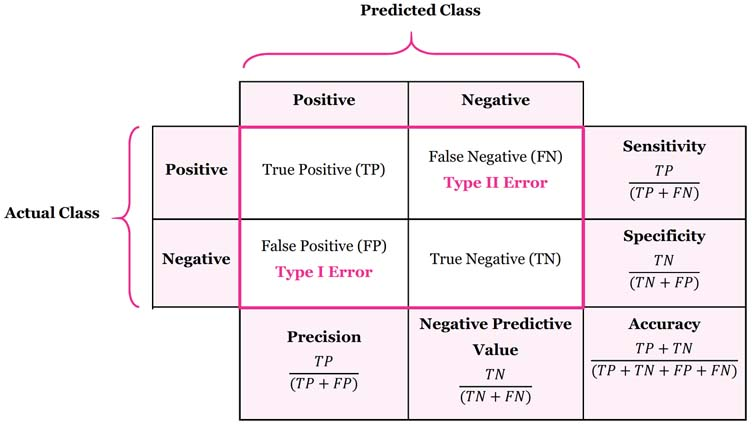

# Roc Auc Curve

https://www.geeksforgeeks.org/auc-roc-curve/
AUC-ROC curve is a graph used to check how well a binary classification model works. It helps us to understand how well the model separates the positive cases like people with a disease from the negative cases like people without the disease at different threshold level. It shows how good the model is at telling the difference between the two classes by plotting:

- True Positive Rate (TPR): how often the model correctly predicts the positive cases also known as Sensitivity or Recall.
- False Positive Rate (FPR): how often the model incorrectly predicts a negative case as positive.
- Specificity: measures the proportion of actual negatives that the model correctly identifies. It is calculated as 1 - FPR.

The higher the curve the better the model is at making correct predictions.

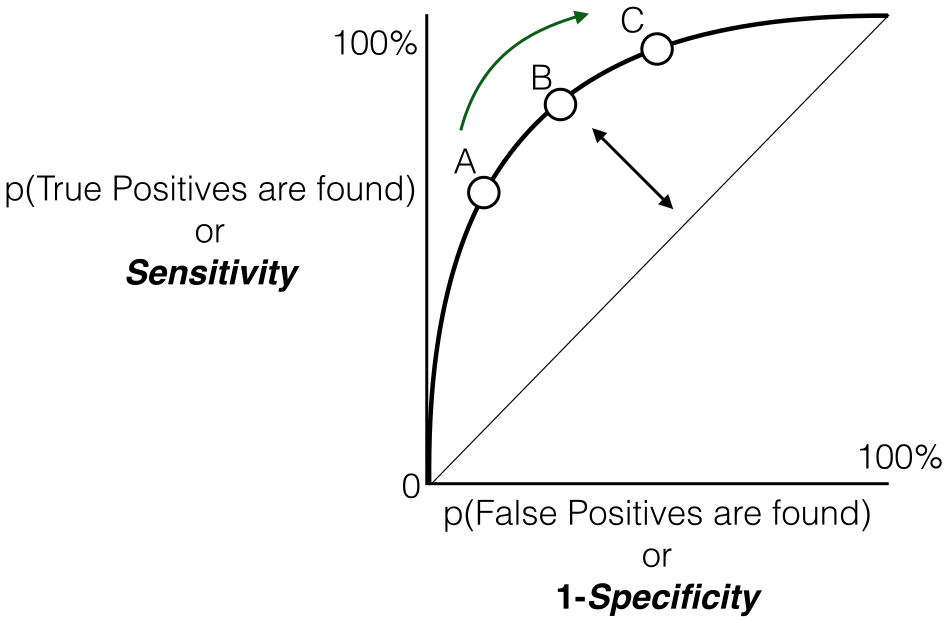

These terms are derived from the confusion matrix which provides the following values:

- True Positive (TP): Correctly predicted positive instances
- True Negative (TN): Correctly predicted negative instances
- False Positive (FP): Incorrectly predicted as positive
- False Negative (FN): Incorrectly predicted as negative

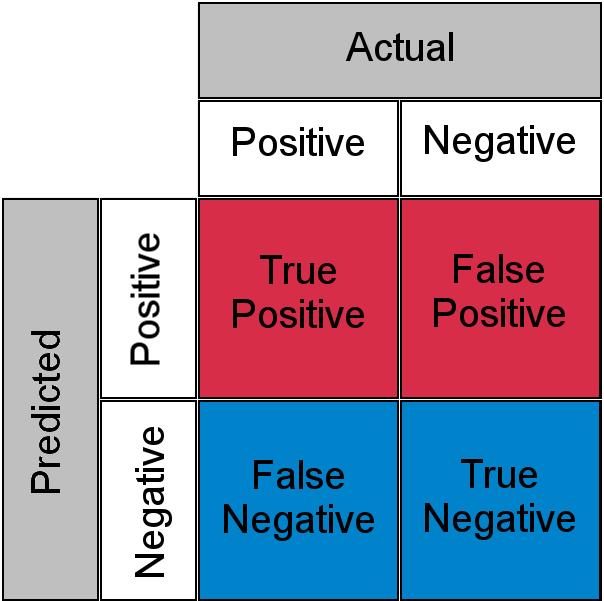

ROC Curve : It plots TPR vs. FPR at different thresholds. It represents the trade-off between the sensitivity and specificity of a classifier.

AUC(Area Under the Curve): measures the area under the ROC curve. A higher AUC value indicates better model performance as it suggests a greater ability to distinguish between classes. An AUC value of 1.0 indicates perfect performance while 0.5 suggests it is random guessing.

In [33]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
80,5.5,2.4,3.8,1.1
84,5.4,3.0,4.5,1.5
33,5.5,4.2,1.4,0.2
81,5.5,2.4,3.7,1.0
93,5.0,2.3,3.3,1.0
17,5.1,3.5,1.4,0.3
36,5.5,3.5,1.3,0.2
82,5.8,2.7,3.9,1.2
69,5.6,2.5,3.9,1.1
65,6.7,3.1,4.4,1.4


In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = classifier.predict_proba(X_test)

y_pred_proba


array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binary classification: Setosa (0) vs non-Setosa (1)
y_binary = (y == 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict the probabilities of the positive class (Setosa)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Setosa)



In [36]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

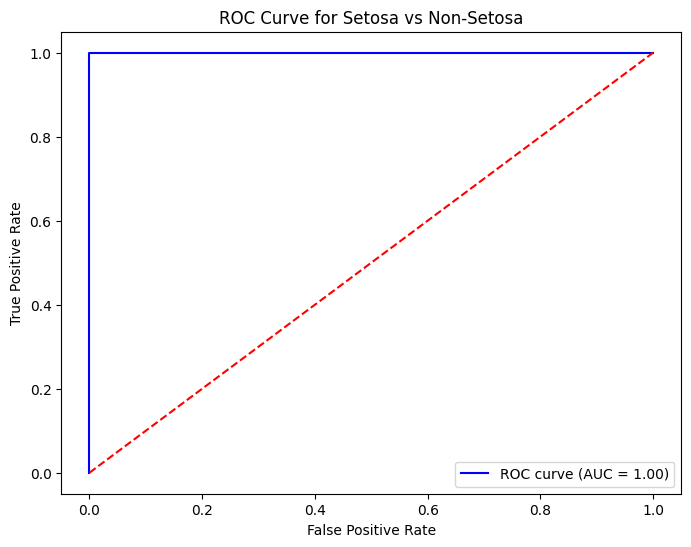

In [37]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Setosa vs Non-Setosa')
plt.legend(loc='lower right')
plt.show()


### Use Cross Validation use in LogisticRegression 

In [38]:
# from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [39]:
cv = KFold(n_splits=5)
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv = cv, scoring = "accuracy")

scores
np.mean(scores)

np.float64(1.0)

In [42]:
# https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection


## Multiclass classifications

In [46]:
import warnings
warnings.filterwarnings('ignore')

# Create the datasets for Multiclass Classification using make_classifocations
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_samples = 1000, n_features=10, n_redundant =5, n_informative=5, n_classes=3, random_state=1)

- Parameters:
    - penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
    - C float, default=1.0
    - solver {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
    - max_iter int, default=1000
    - multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
    - verbose {0, 1, 2}, default=0

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html


# OVR

- What is OvR in logistic regression?
As we all know, Logistic Regression is a machine learning classification algorithm used to predict binary outcomes for a given set of independent variables. OneVsRest(OvR in short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification

- Binary Classification: Classification tasks with two classes.
- Multi-class Classification: Classification tasks with more than two classes.
Some algorithms are designed for binary classification problems. Examples include:

    Logistic Regression
    Perceptron
    Support Vector Machines

In [ ]:
#ovr
# https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
model = LogisticRegression(multi_class='ovr', solver = 'lbfgs')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

X_train.shape, X_test.shape


((700, 10), (300, 10))

In [48]:
model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
# model.predict_proba(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75 21  3]
 [10 58 21]
 [23 14 75]]
0.6933333333333334
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        99
           1       0.62      0.65      0.64        89
           2       0.76      0.67      0.71       112

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.69      0.69       300



# multinomial logistic regression 

https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

In [51]:
# multinomial
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
model = LogisticRegression(multi_class='multinomial',solver='saga')
model


# -- 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# that's why show this error 

#roc auc is only for binary classification problem

[[70 21  8]
 [13 57 19]
 [21 13 78]]
0.6833333333333333
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        99
           1       0.63      0.64      0.63        89
           2       0.74      0.70      0.72       112

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.69      0.68      0.68       300



### Types Logistic Regression
- https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
- https://medium.com/@jumbongjunior1999/ordinal-logistic-regression-in-python-and-r-f6ee05d48d16

<!-- import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Treat the target variable as ordinal: 0 -> Setosa, 1 -> Versicolor, 2 -> Virginica
y_ord = y  # Already integers (0, 1, 2) that we can treat as ordinal

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_ord, test_size=0.3, random_state=42)

# Train an Ordered Logit (Ordinal Logistic Regression) model
model = OrderedModel(y_train, X_train, distr='logit')
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predicting on the test set
preds = results.predict(X_test)

# The predictions are probabilities for each class. We take the class with the highest probability.
y_pred = np.argmax(preds, axis=1)

# Evaluate the model performance
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally: Visualize the predictions vs true labels
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='True Labels', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Labels', color='red', alpha=0.6)
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Class (0=Setosa, 1=Versicolor, 2=Virginica)')
plt.title('True vs Predicted Labels (Ordered Logit)')
plt.show()

 -->

## CrossValidations in LogisticRegressions


Cross-validation scores: [1.         1.         1.         0.93333333 0.93333333 0.93333333
 1.         1.         0.93333333 0.93333333]
Mean accuracy: 0.97
Standard deviation: 0.03


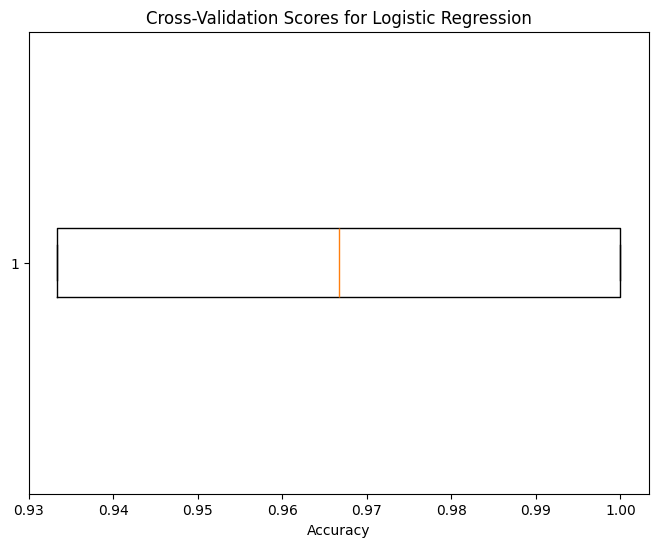

In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Logistic Regression model
model = LogisticRegression(max_iter=200)

# Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores (accuracy by default)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores):.2f}")
print(f"Standard deviation: {np.std(scores):.2f}")

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(scores, vert=False)
plt.title('Cross-Validation Scores for Logistic Regression')
plt.xlabel('Accuracy')
plt.show()


## Hyper Parameter Tuning
Hyperparameter tuning is the process of selecting the best combination of hyperparameters for a model. Hyperparameters  

grid search, random search, and Bayesian optimization are some of the methods used for hyperparameter tuning.

### GridSearchCV>> take all possible

In [ ]:
#GridSearchCV>> take all possible
from sklearn.model_selection import GridSearchCV

params = {
        'penalty': ('l1', 'l2', 'elasticnet'), 
          'C': [1, 2, 3, 4, 5, 10, 20, 30, 40]
          }

classifier = LogisticRegression()

In [ ]:
clf = GridSearchCV(classifier, param_grid=params, cv = 5, verbose=3)

clf.fit(X_train, y_train)

In [58]:
clf.best_score_

clf.best_params_

{'C': 1, 'penalty': 'l2'}

### 2. randomized search cv

In [ ]:

#2. randomized search cv
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(classifier, param_distributions=params, cv = 5, n_iter=10, verbose=4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .............C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .............C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END .............C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END .............C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END .............C=2, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END ...................C=2, penalty=l2;, score=1.000 total time=   0.0s
[CV 2/5] END ...................C=2, penalty=l2;, score=0.905 total time=   0.1s
[CV 3/5] END ...................C=2, penalty=l2;, score=0.952 total time=   0.0s
[CV 4/5] END ...................C=2, penalty=l2;, score=1.000 total time=   0.0s
[CV 5/5] END ...................C=2, penalty=l2;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=20, penalty=l2;, score=0.952 total time=   0.0s
[CV 2/5] END ..................C=20, penalty=l2;

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40],
                                        'penalty': ('l1', 'l2', 'elasticnet')},
                   verbose=4)

In [60]:
clf.best_score_

clf.best_params_

{'penalty': 'l2', 'C': 2}

#### Implementations GridSearchCV


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define the Logistic Regression classifier
classifier = LogisticRegression(max_iter=200)

# 4. Define the parameter grid for tuning
params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers for Logistic Regression
    'penalty': ['l2'],  # Regularization type
    'multi_class': ['ovr', 'multinomial']  # Multiclass strategies
}

# 5. Create the GridSearchCV object
clf = GridSearchCV(classifier, param_grid=params, cv=5, verbose=3)

# 6. Fit the model (perform grid search with cross-validation)
clf.fit(X_train, y_train)

# 7. Check the best hyperparameters
print("Best Hyperparameters:", clf.best_params_)

# 8. Evaluate the model with the best parameters
y_pred = clf.predict(X_test)

# Print classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# 9. Optionally, inspect all results
# Display the full results of grid search
results = pd.DataFrame(clf.cv_results_)
print("Grid Search Results:\n", results[['param_C', 'param_solver', 'param_multi_class', 'mean_test_score', 'rank_test_score']])

